# Vehicle Fraud Detection System

## Introduction
This notebook documents the process of developing a vehicle fraud detection system using machine learning. The goal is to create a reproducible and transparent workflow.

## Libraries and Environment Setup

Revelant libraries and functions are imported to set up the environment and ensure reproducibility.

Install all necessary libraries by running `%pip install -r "../requirements.txt"`

In [2]:
# Importing necessary libraries

# Data manipulation and visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# Utility libraries
import re

# Machine learning libraries
from sklearn.ensemble import RandomForestClassifier

# Setting random seed for random value imputation in data preprocessing
seed = 42
np.random.seed(seed)

# Verify the libraries are correctly installed and the environment is set up
print("Libraries imported and environment set up.")

Libraries imported and environment set up.


In [3]:
import sys

# Print python version
print("Python version:", sys.version)

# Get a list of modules that you have imported
imported_modules = [
    'pandas', 'numpy', 'matplotlib', 'seaborn', 'tabulate', 'sklearn',
    'xgboost', 'imblearn'
]

# Print the name and version of each imported module
for module in imported_modules:
    try:
        imported_module = __import__(module)
        version = imported_module.__version__
        print(f"{module} version: {version}")
    except AttributeError:
        # Some modules may not have versions
        print(f"{module} version not found")


Python version: 3.11.9 (tags/v3.11.9:de54cf5, Apr  2 2024, 10:12:12) [MSC v.1938 64 bit (AMD64)]
pandas version: 2.2.3
numpy version: 2.2.4
matplotlib version: 3.10.1
seaborn version: 0.13.2
tabulate version: 0.9.0
sklearn version: 1.6.1
xgboost version: 3.0.0
imblearn version: 0.13.0


## Obtain

Formatted as a CSV file, the dataset is loaded into this iPython Notebook via the following code cell.
The data can also be downloaded by accessing the following link: https://www.kaggle.com/datasets/khusheekapoor/vehicle-insurance-fraud-detection?select=carclaims.csv

In [4]:
# Load csv data
carclaims_data = pd.read_csv('../data/raw/raw_data.csv')

# View first 5 rows of the imported dataframe
carclaims_data.head()


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No


In [5]:
# Identify unique values of all features
for column in carclaims_data.columns:
    unique_values = carclaims_data[column].unique()
    print(f"Unique values for '{column}': {unique_values}")

Unique values for 'Month': ['Dec' 'Jan' 'Oct' 'Jun' 'Feb' 'Nov' 'Apr' 'Mar' 'Aug' 'Jul' 'May' 'Sep']
Unique values for 'WeekOfMonth': [5 3 2 4 1]
Unique values for 'DayOfWeek': ['Wednesday' 'Friday' 'Saturday' 'Monday' 'Tuesday' 'Sunday' 'Thursday']
Unique values for 'Make': ['Honda' 'Toyota' 'Ford' 'Mazda' 'Chevrolet' 'Pontiac' 'Accura' 'Dodge'
 'Mercury' 'Jaguar' 'Nisson' 'VW' 'Saab' 'Saturn' 'Porche' 'BMW' 'Mecedes'
 'Ferrari' 'Lexus']
Unique values for 'AccidentArea': ['Urban' 'Rural']
Unique values for 'DayOfWeekClaimed': ['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday'
 '0']
Unique values for 'MonthClaimed': ['Jan' 'Nov' 'Jul' 'Feb' 'Mar' 'Dec' 'Apr' 'Aug' 'May' 'Jun' 'Sep' 'Oct'
 '0']
Unique values for 'WeekOfMonthClaimed': [1 4 2 3 5]
Unique values for 'Sex': ['Female' 'Male']
Unique values for 'MaritalStatus': ['Single' 'Married' 'Widow' 'Divorced']
Unique values for 'Age': [21 34 47 65 27 20 36  0 30 42 71 52 28 61 38 41 32 40 63 31 45 60 39 55
 35 44 7

In [6]:
# Check all columms
carclaims_data.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'PolicyNumber', 'RepNumber', 'Deductible',
       'DriverRating', 'Days:Policy-Accident', 'Days:Policy-Claim',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange-Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'FraudFound'],
      dtype='object')

## Scrub

### 1. Checking the data type

In [7]:
# Check columns type
data_types = carclaims_data.dtypes
print(data_types)

Month                   object
WeekOfMonth              int64
DayOfWeek               object
Make                    object
AccidentArea            object
DayOfWeekClaimed        object
MonthClaimed            object
WeekOfMonthClaimed       int64
Sex                     object
MaritalStatus           object
Age                      int64
Fault                   object
PolicyType              object
VehicleCategory         object
VehiclePrice            object
PolicyNumber             int64
RepNumber                int64
Deductible               int64
DriverRating             int64
Days:Policy-Accident    object
Days:Policy-Claim       object
PastNumberOfClaims      object
AgeOfVehicle            object
AgeOfPolicyHolder       object
PoliceReportFiled       object
WitnessPresent          object
AgentType               object
NumberOfSuppliments     object
AddressChange-Claim     object
NumberOfCars            object
Year                     int64
BasePolicy              object
FraudFou

### 2. Checking for NULL values

In [8]:
# Check null values of each features
null_values = carclaims_data.isnull().sum()
null_values[null_values > 0]
print(null_values)

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days:Policy-Accident    0
Days:Policy-Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange-Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
FraudFound              0
dtype: int64


### 3. Checking for duplicates

In [9]:
# Check for duplicate rows
duplicate_rows = carclaims_data[carclaims_data.duplicated()]

print("Number of duplicate rows:", duplicate_rows.shape[0])

if not duplicate_rows.empty:
    print("Duplicate rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")


Number of duplicate rows: 0
No duplicate rows found.


### 4. Checking for zero values in the dataset.

In [10]:
# Check for zero values (0 or '0') in the dataset
zero_values = ((carclaims_data == '0') + (carclaims_data == 0)).sum()
print("Number of zero values in each column:")
print(zero_values)

Number of zero values in each column:
Month                     0
WeekOfMonth               0
DayOfWeek                 0
Make                      0
AccidentArea              0
DayOfWeekClaimed          1
MonthClaimed              1
WeekOfMonthClaimed        0
Sex                       0
MaritalStatus             0
Age                     320
Fault                     0
PolicyType                0
VehicleCategory           0
VehiclePrice              0
PolicyNumber              0
RepNumber                 0
Deductible                0
DriverRating              0
Days:Policy-Accident      0
Days:Policy-Claim         0
PastNumberOfClaims        0
AgeOfVehicle              0
AgeOfPolicyHolder         0
PoliceReportFiled         0
WitnessPresent            0
AgentType                 0
NumberOfSuppliments       0
AddressChange-Claim       0
NumberOfCars              0
Year                      0
BasePolicy                0
FraudFound                0
dtype: int64


Removing the rows in 'DayOfWeekClaimed' and ‘MonthClaimed’ features that contain zero values would not cause significant bias as the majority of the dataset consists of observations with complete information.

In [11]:
# Remove rows where 'DayOfWeekClaimed' and ‘MonthClaimed’ equal to '0' or 0
carclaims_data = carclaims_data[(carclaims_data['DayOfWeekClaimed'] != '0') & (carclaims_data['MonthClaimed'] != '0') & (carclaims_data['DayOfWeekClaimed'] != 0) & (carclaims_data['MonthClaimed'] != 0)]

### 5. Random value imputation

As it concerns a driver's age, the presence of zero values in the 'age' column is not sensible. Upon closer inspection of the 'Age Policy' attribute, all ages of 0 correspond to the 16-17 Age Policy category. Hence, to correct this, the zero values observed in the 'age' column are randomly imputed with either 16 or 17.


In [12]:
# Print unique AgeOfPolicyHolder for entries where Age is 0
unique_age_zero_policy_holder_ages = carclaims_data.loc[carclaims_data['Age'] == 0, 'AgeOfPolicyHolder'].unique()
print("Unique AgeOfPolicyHolder for entries where Age is 0: " + unique_age_zero_policy_holder_ages)

['Unique AgeOfPolicyHolder for entries where Age is 0: 16 to 17']


In [13]:
# 0 values only occurs on 16 to 17 age cateory
# Random number of 16 or 17 is imputed to replace 0 values to prevent bias

carclaims_data.loc[carclaims_data['Age'] == 0, 'Age'] = np.random.choice([16, 17], size=(carclaims_data['Age'] == 0).sum())

In [14]:
# Re-checking zero values in the dataset after updates

rechecked_zero_values = (carclaims_data == 0).sum()
print("Rechecked number of zero values in each column:")
print(rechecked_zero_values)

Rechecked number of zero values in each column:
Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days:Policy-Accident    0
Days:Policy-Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange-Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
FraudFound              0
dtype: int64


In [15]:
# Save to csv
carclaims_data.to_csv("../data/interim/preprocessed_data.csv", index=False)

## Explore

### **1. Univariate analysis**

*   Statistcal summaries of numerical features
*   Frequency tables of categorical features
*   Bar Plots of categorical features



In [16]:
# Summary statistics for numeric attributes

numeric_attributes = carclaims_data.select_dtypes(include=['int64', 'float64'])
summary_statistics = numeric_attributes.describe()
print("Summary Statistics for Numeric Attributes:")
print(summary_statistics)

Summary Statistics for Numeric Attributes:
        WeekOfMonth  WeekOfMonthClaimed           Age  PolicyNumber  \
count  15419.000000        15419.000000  15419.000000   15419.00000   
mean       2.788637            2.694079     40.199559    7710.90168   
std        1.287611            1.259082     12.659579    4451.37980   
min        1.000000            1.000000     16.000000       1.00000   
25%        2.000000            2.000000     31.000000    3856.50000   
50%        3.000000            3.000000     38.000000    7711.00000   
75%        4.000000            4.000000     48.000000   11565.50000   
max        5.000000            5.000000     80.000000   15420.00000   

          RepNumber    Deductible  DriverRating          Year  
count  15419.000000  15419.000000  15419.000000  15419.000000  
mean       8.482846    407.704780      2.487840   1994.866528  
std        4.599798     43.952379      1.119482      0.803309  
min        1.000000    300.000000      1.000000   1994.000000

In [17]:
# Distributions for all categorical variables in frequency tables

categorical_variables = carclaims_data.select_dtypes(include=['object'])

for var in categorical_variables.columns:
    # Frequency table
    freq_table = carclaims_data[var].value_counts().reset_index()
    freq_table.columns = [var, 'Frequency']
    print(f"\nFrequency Table for {var}:")
    print(tabulate(freq_table, headers='keys', tablefmt='psql'))


Frequency Table for Month:
+----+---------+-------------+
|    | Month   |   Frequency |
|----+---------+-------------|
|  0 | Jan     |        1411 |
|  1 | May     |        1367 |
|  2 | Mar     |        1360 |
|  3 | Jun     |        1321 |
|  4 | Oct     |        1305 |
|  5 | Dec     |        1285 |
|  6 | Apr     |        1280 |
|  7 | Feb     |        1266 |
|  8 | Jul     |        1256 |
|  9 | Sep     |        1240 |
| 10 | Nov     |        1201 |
| 11 | Aug     |        1127 |
+----+---------+-------------+

Frequency Table for DayOfWeek:
+----+-------------+-------------+
|    | DayOfWeek   |   Frequency |
|----+-------------+-------------|
|  0 | Monday      |        2615 |
|  1 | Friday      |        2445 |
|  2 | Tuesday     |        2300 |
|  3 | Thursday    |        2173 |
|  4 | Wednesday   |        2159 |
|  5 | Saturday    |        1982 |
|  6 | Sunday      |        1745 |
+----+-------------+-------------+

Frequency Table for Make:
+----+-----------+-------------+

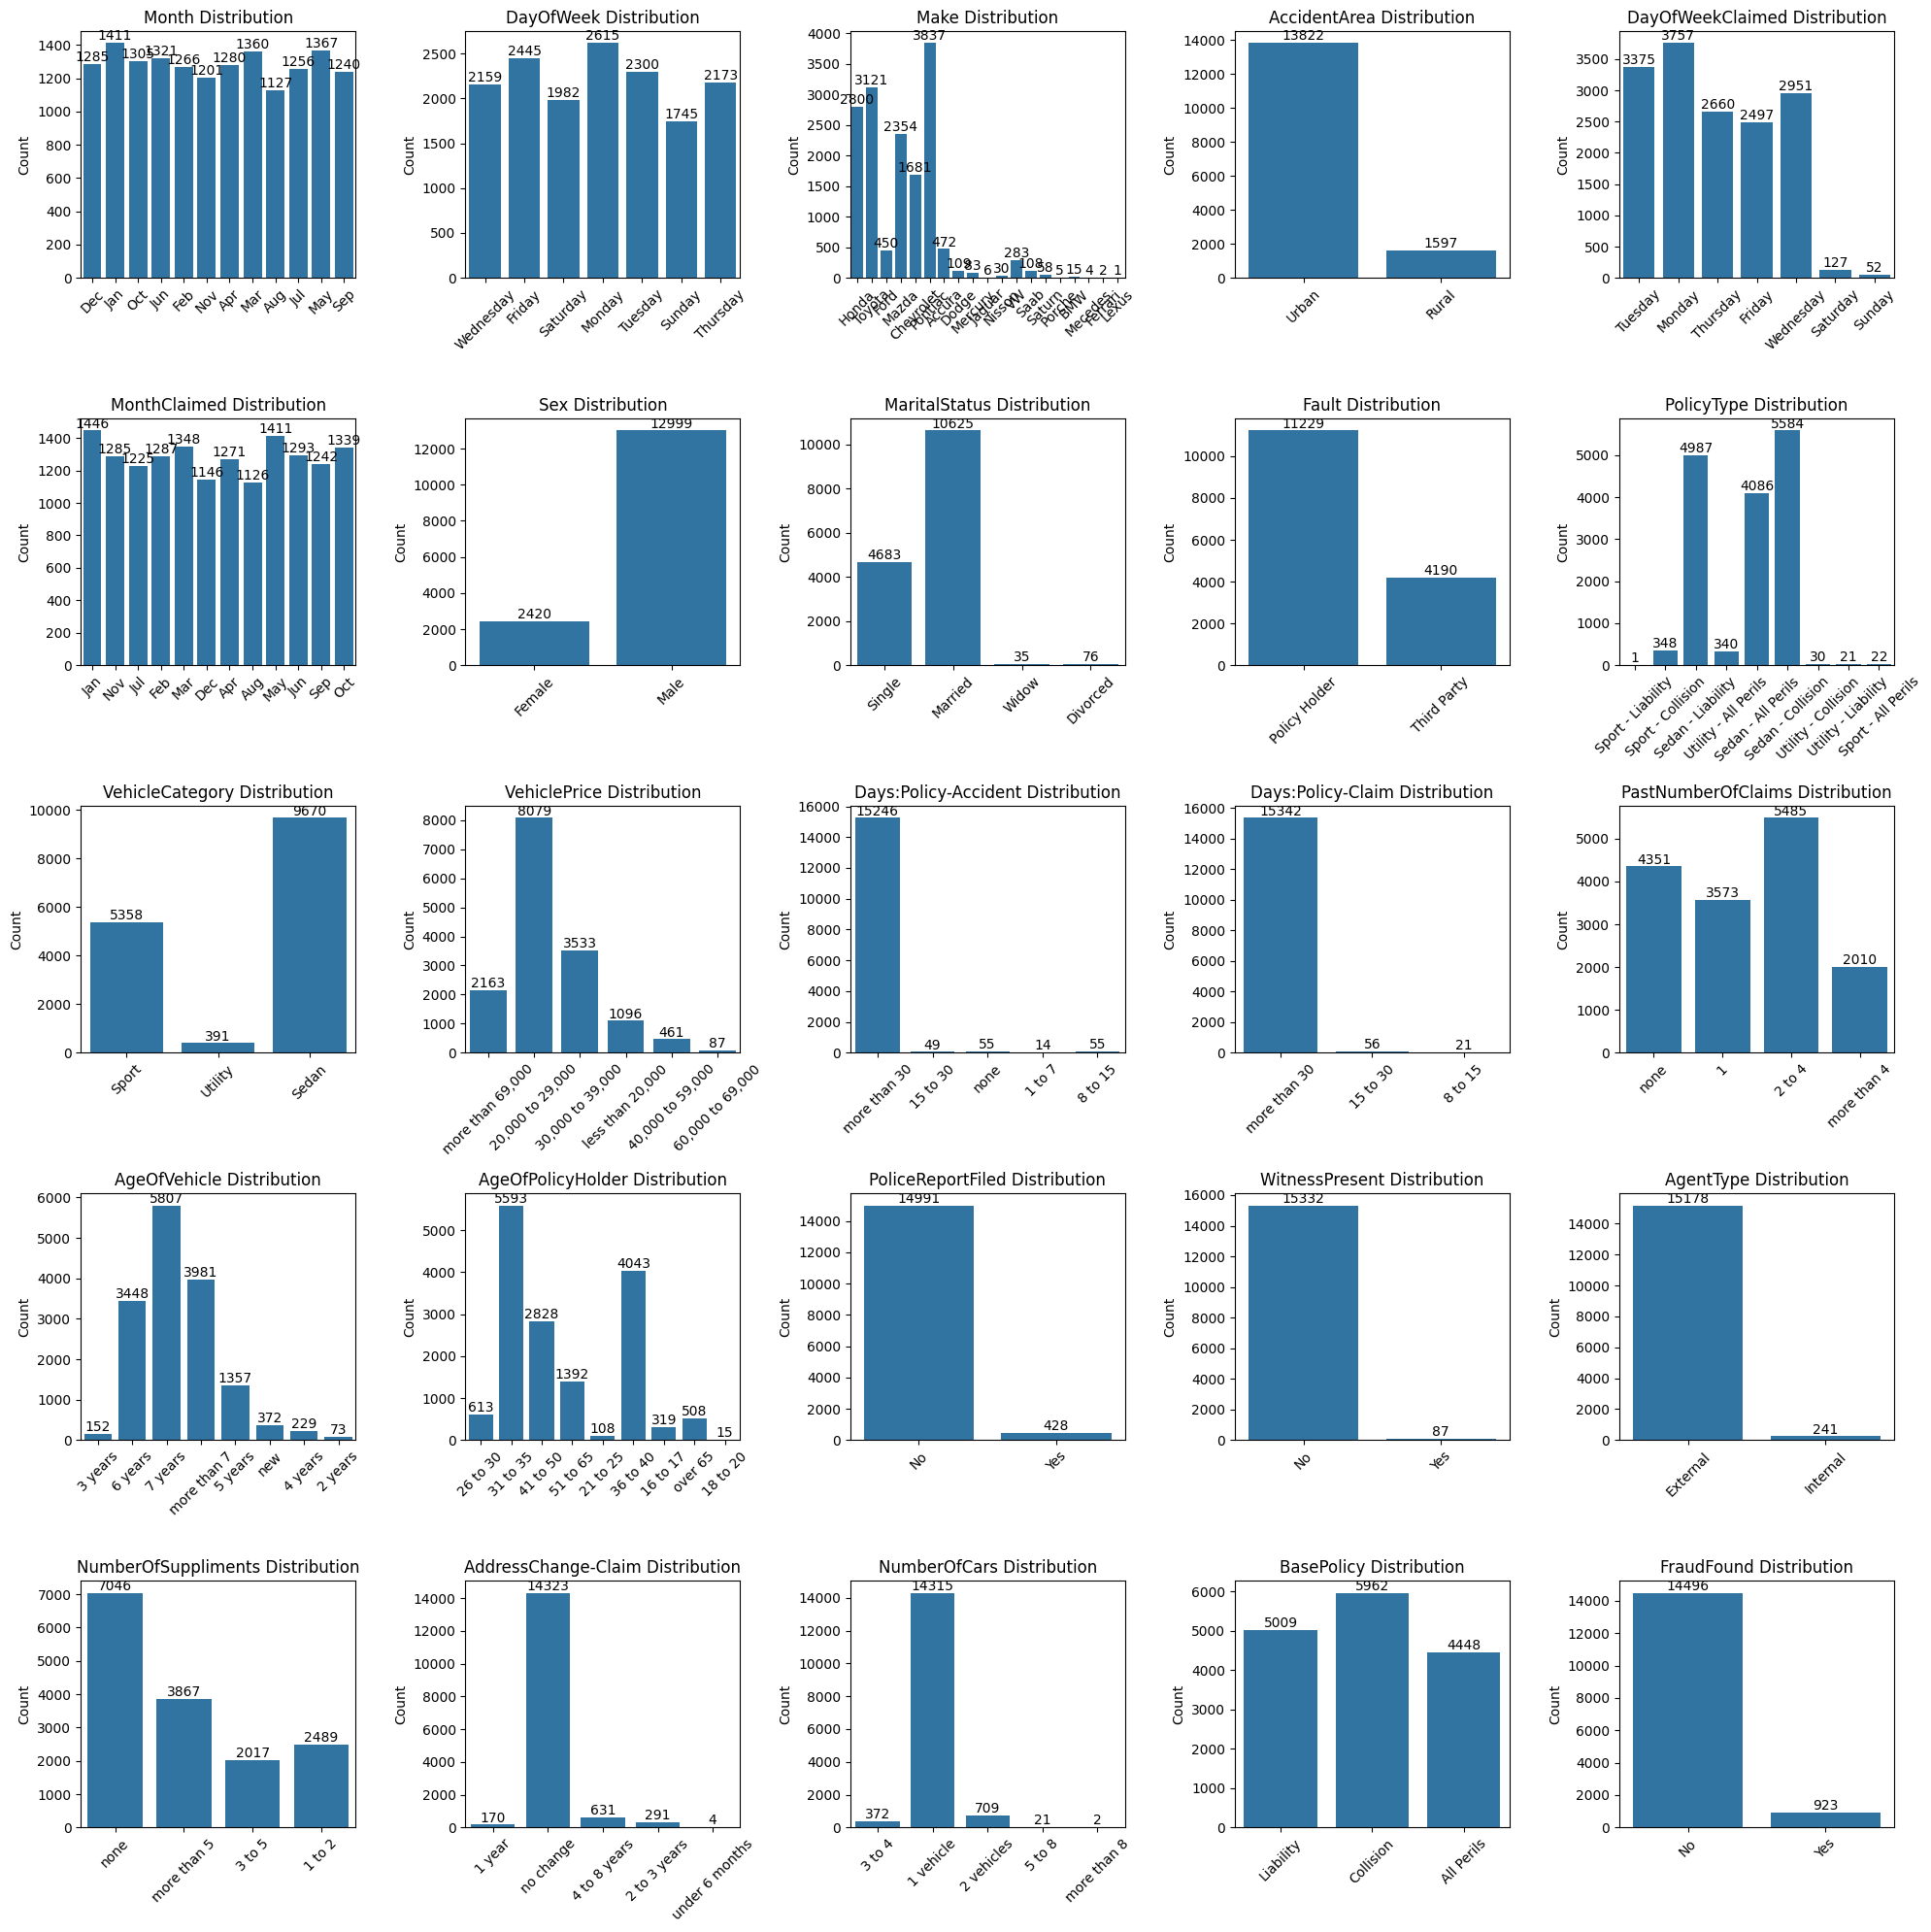

In [18]:
num_rows, num_cols = (5,5)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))

# Flatten the axes array to iterate over subplots
axes_flat = axes.flatten()

# Loop through each categorical feature and plot
for i, column in enumerate(categorical_variables.columns):
    ax = axes_flat[i]
    sns.countplot(x=column, data=carclaims_data, ax=ax)
    ax.set_title(f'{column} Distribution')
    ax.set_xlabel('')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)

    # Annotate each bar with the count
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Hide empty subplots if there are fewer than 25 categorical features
for j in range(len(categorical_variables.columns), num_rows*num_cols):
    axes_flat[j].axis('off')

plt.tight_layout()
plt.savefig("../reports/figures/1-distribution.png")
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_14440\1859847547.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Month', data=carclaims_data, palette='coolwarm', order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])


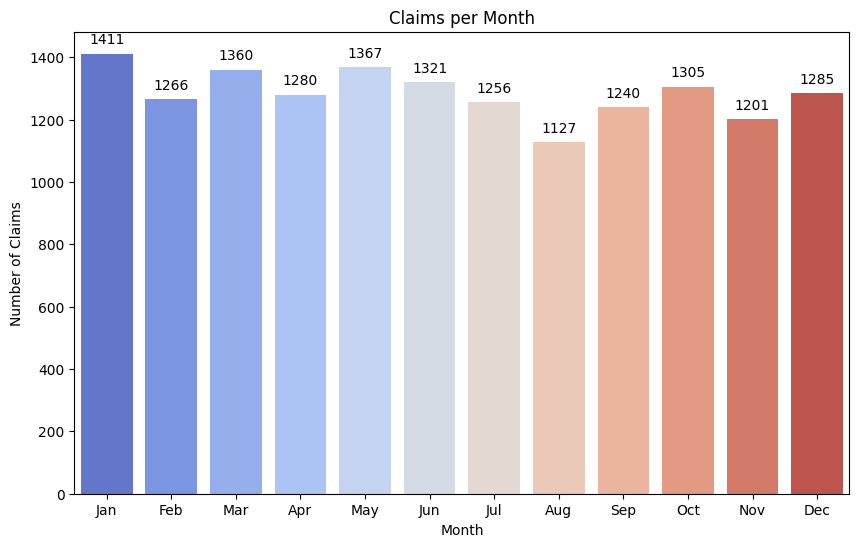

In [19]:
# Plotting Claims per Month
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Month', data=carclaims_data, palette='coolwarm', order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Claims per Month')
plt.xlabel('Month')
plt.ylabel('Number of Claims')

# Annotate each bar with the count
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.savefig("../reports/figures/2-claims-per-month.png")
plt.show()

As we can see on the result, it seems the claims for each months are stable and doesn't have seasonal trends in the insurance claims.

C:\Users\user\AppData\Local\Temp\ipykernel_14440\3373735538.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='AgeOfVehicle', data=carclaims_data, palette='coolwarm', order=age_order)


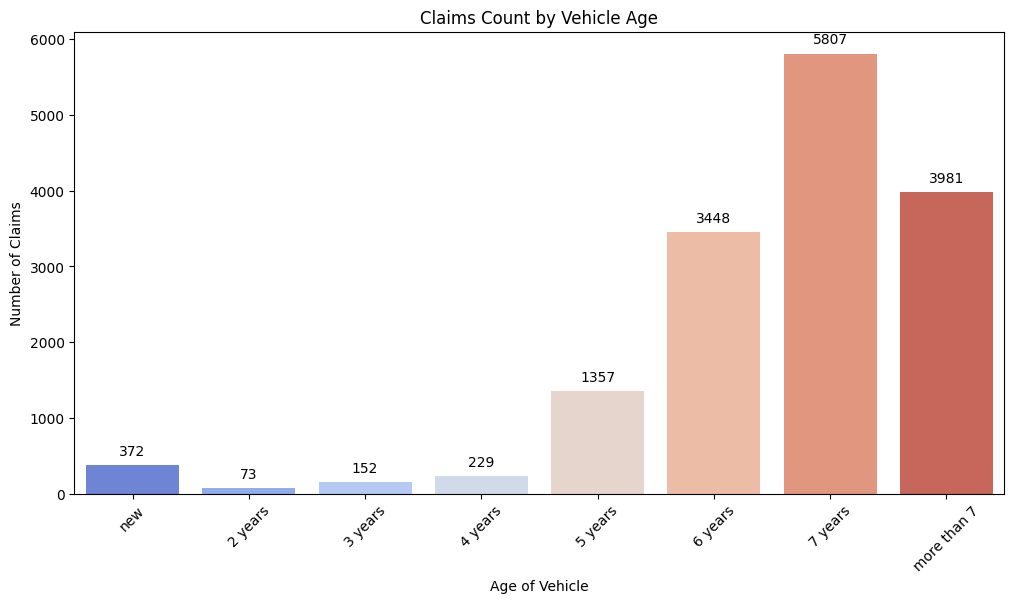

In [20]:
# Plot for Vehicle Age to Claims Count
plt.figure(figsize=(12, 6))

age_order = ['new', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', 'more than 7']

ax = sns.countplot(x='AgeOfVehicle', data=carclaims_data, palette='coolwarm', order=age_order)
plt.title('Claims Count by Vehicle Age')
plt.xlabel('Age of Vehicle')
plt.ylabel('Number of Claims')
plt.xticks(rotation=45)

# Annotate each bar with the count
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.savefig("../reports/figures/3-claims-by-vehicle-age.png")
plt.show()


Age of vehicle also correlated with the claims occurs. Older car have more probability to crash.

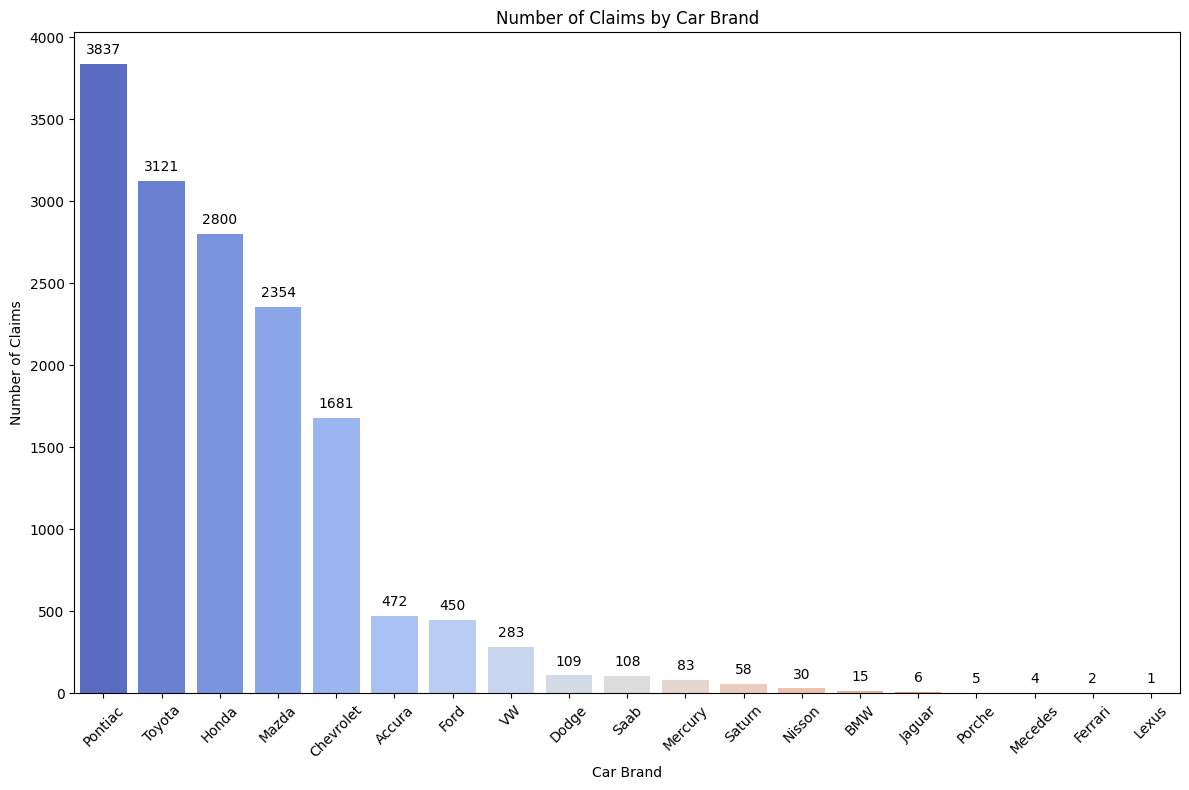

In [21]:
# Plot Number of Claims by Car Brand
fig, ax = plt.subplots(figsize=(12, 8))

brand_counts = carclaims_data['Make'].value_counts()
sns.barplot(x=brand_counts.index, y=brand_counts.values, hue=brand_counts.index, dodge=False, palette='coolwarm')
ax.set_title('Number of Claims by Car Brand')
ax.set_xlabel('Car Brand')
ax.set_ylabel('Number of Claims')
ax.tick_params(axis='x', rotation=45)

# Annotate each bar with the count for Number of Claims by Car Brand
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.savefig("../reports/figures/4-claims-by-car-brand.png")
plt.show()


### **2. Bivariate Analysis**


*   Bar charts
*   100% Stacked Columns (to examine percentages)

Bivariate analyses were conducted to investigate the relationship between the occurrence of fraud and the following features:
- Police report
- Presence of a witness
- Area of the accident
- Age of vehicle
- Number of cars involved in the accident
- Car brand

Bivariate analysis was also pexgboostormed for:
- Age vs Gender

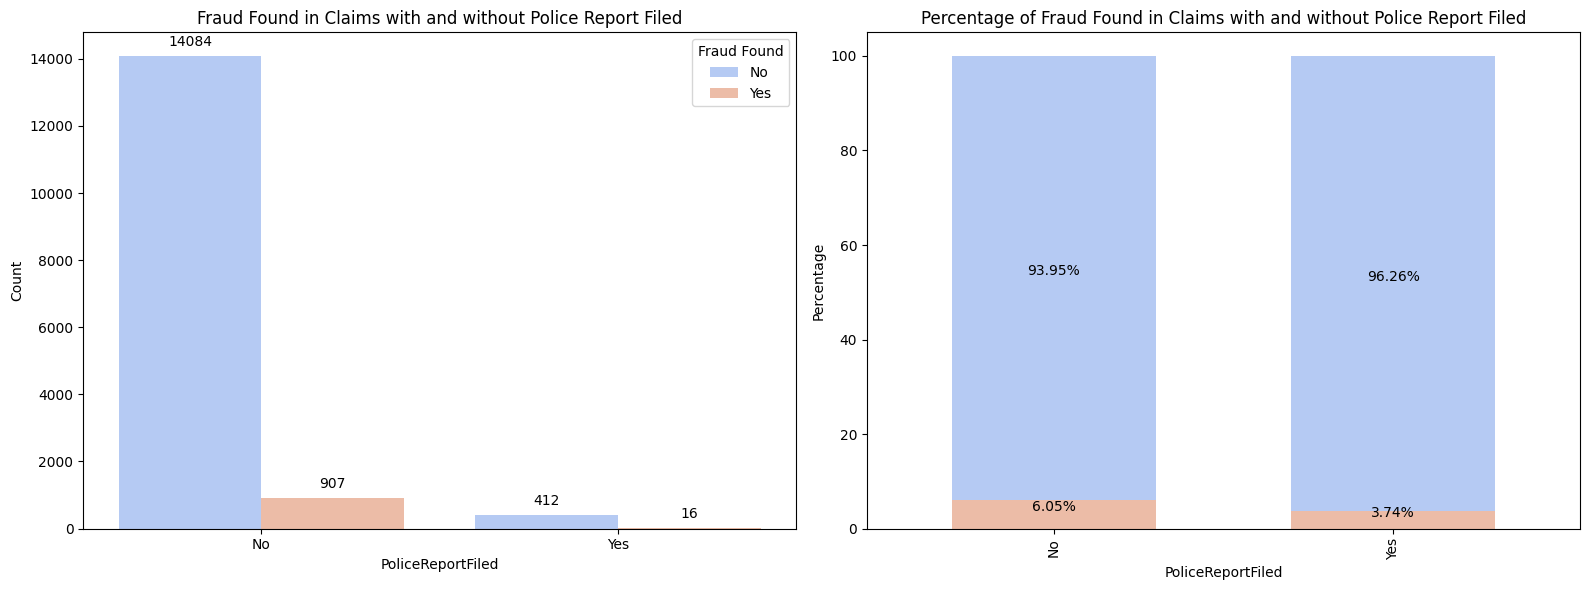

In [22]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot on the left
ax1 = sns.countplot(ax=axes[0], x='PoliceReportFiled', hue='FraudFound', data=carclaims_data, palette='coolwarm')
ax1.set_title('Fraud Found in Claims with and without Police Report Filed')
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, ['No', 'Yes'], title='Fraud Found')
ax1.set_ylabel('Count')

# Annotate each bar with the count
for p in ax1.patches:
    height = int(p.get_height())
    if height > 0:
        ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Plot on the right (100% stacked column)
fraud_percentage = carclaims_data.groupby('PoliceReportFiled')['FraudFound'].value_counts(normalize=True).unstack() * 100
fraud_percentage = fraud_percentage[['Yes', 'No']]  # Reorder the columns
fraud_percentage.plot(kind='bar', stacked=True, ax=axes[1], color = ["#ecbca7", "#b5caf3"], width=0.6)
axes[1].set_title('Percentage of Fraud Found in Claims with and without Police Report Filed')
axes[1].set_ylabel('Percentage')

# Annotate each segment with the percentage
for p in axes[1].patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    axes[1].annotate(f'{height:.2f}%', (x + width / 2, y + height / 2), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Hide the legend for the plot on the right
axes[1].legend().set_visible(False)

plt.tight_layout()
plt.savefig("../reports/figures/5-police-report.png")
plt.show()

Based on the plot above, there is a higher likelihood for fraud to occur when if a police report is not filed.

C:\Users\user\AppData\Local\Temp\ipykernel_14440\1414065826.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No', 'Yes'], rotation=0)


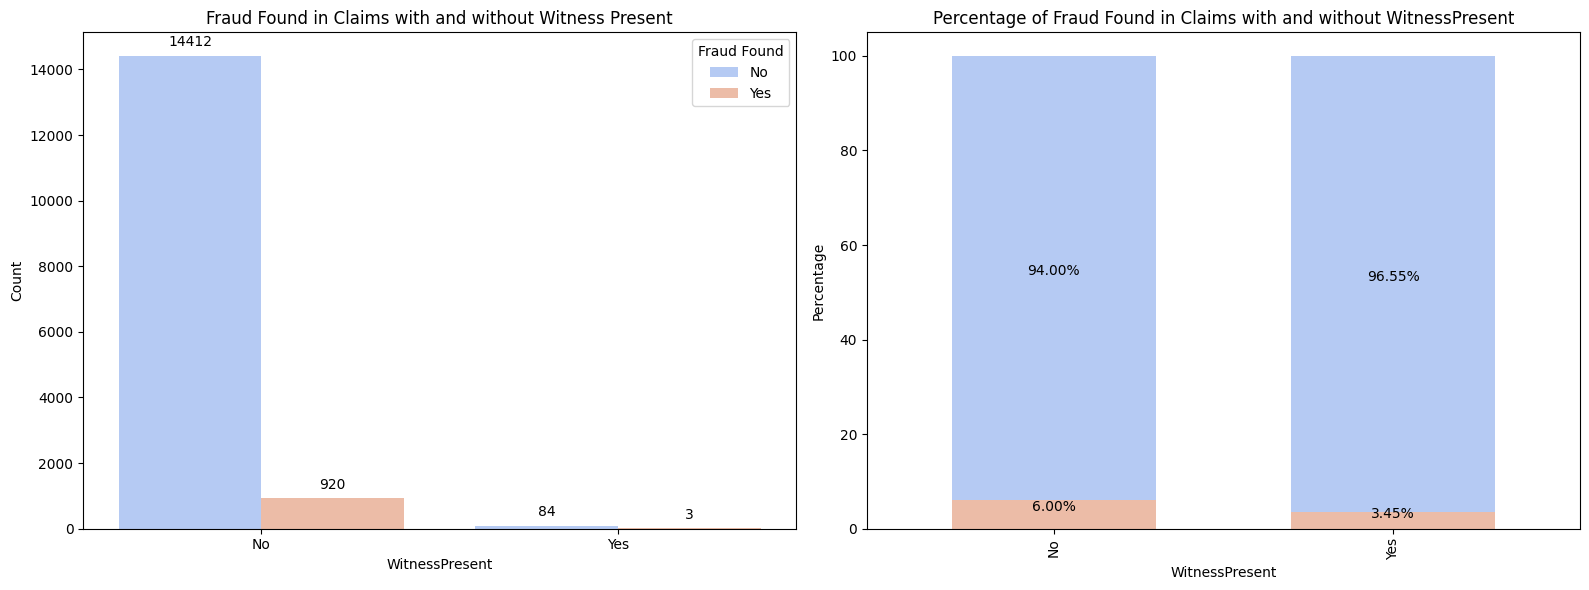

In [23]:
# Plot Witness Presence connection with Fraud
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot
ax = sns.countplot(ax=axes[0],x='WitnessPresent', hue='FraudFound', data=carclaims_data, palette='coolwarm')
ax.set_title('Fraud Found in Claims with and without Witness Present')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['No', 'Yes'], title='Fraud Found')
ax.set_xticklabels(['No', 'Yes'], rotation=0)
ax.set_ylabel('Count')

# Annotate each bar with the count, excluding zero counts
for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Plot on the right (100% stacked column)
fraud_percentage = carclaims_data.groupby('WitnessPresent')['FraudFound'].value_counts(normalize=True).unstack() * 100
fraud_percentage = fraud_percentage[['Yes', 'No']]  # Reorder the columns
fraud_percentage.plot(kind='bar', stacked=True, ax=axes[1], color = ["#ecbca7", "#b5caf3"], width=0.6)
axes[1].set_title('Percentage of Fraud Found in Claims with and without WitnessPresent')
axes[1].set_ylabel('Percentage')

# Annotate each segment with the percentage
for p in axes[1].patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    axes[1].annotate(f'{height:.2f}%', (x + width / 2, y + height / 2), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Hide the legend for the plot on the right
axes[1].legend().set_visible(False)

plt.tight_layout()
plt.savefig("../reports/figures/6-witness.png")
plt.show()


Based on the plot above, there is a higher likelihood for fraud to occur when if there is no witness present.

C:\Users\user\AppData\Local\Temp\ipykernel_14440\1886491559.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Urban', 'Rural'], rotation=0)  # Avoid using FixedFormatter without FixedLocator


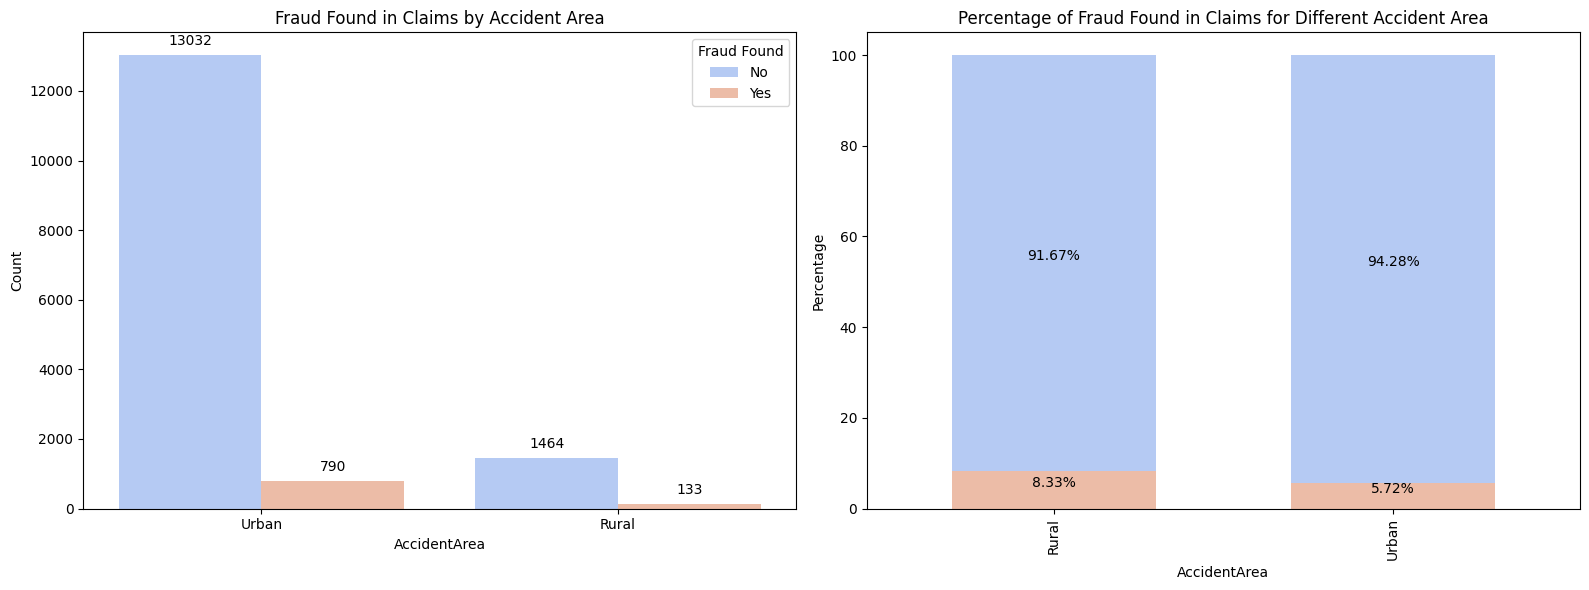

In [24]:
# Plot Accident Area connection with Fraud
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot
ax = sns.countplot(ax=axes[0],x='AccidentArea', hue='FraudFound', data=carclaims_data, palette='coolwarm')
ax.set_title('Fraud Found in Claims by Accident Area')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['No', 'Yes'], title='Fraud Found')
ax.legend(handles, labels, title='Fraud Found')
ax.set_xticklabels(['Urban', 'Rural'], rotation=0)  # Avoid using FixedFormatter without FixedLocator
ax.set_ylabel('Count')

# Annotate each bar with the count
for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Plot on the right (100% stacked column)
fraud_percentage = carclaims_data.groupby('AccidentArea')['FraudFound'].value_counts(normalize=True).unstack() * 100
fraud_percentage = fraud_percentage[['Yes', 'No']]  # Reorder the columns
fraud_percentage.plot(kind='bar', stacked=True, ax=axes[1], color = ["#ecbca7", "#b5caf3"], width=0.6)
axes[1].set_title('Percentage of Fraud Found in Claims for Different Accident Area')
axes[1].set_ylabel('Percentage')

# Annotate each segment with the percentage
for p in axes[1].patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    axes[1].annotate(f'{height:.2f}%', (x + width / 2, y + height / 2), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Hide the legend for the plot on the right
axes[1].legend().set_visible(False)

plt.tight_layout()
plt.savefig("../reports/figures/7-accident-area.png")
plt.show()


Claims reported in urban areas are more likely to be fraudulent than in rural areas.

C:\Users\user\AppData\Local\Temp\ipykernel_14440\3098884153.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['1', '2', '3', '4'])


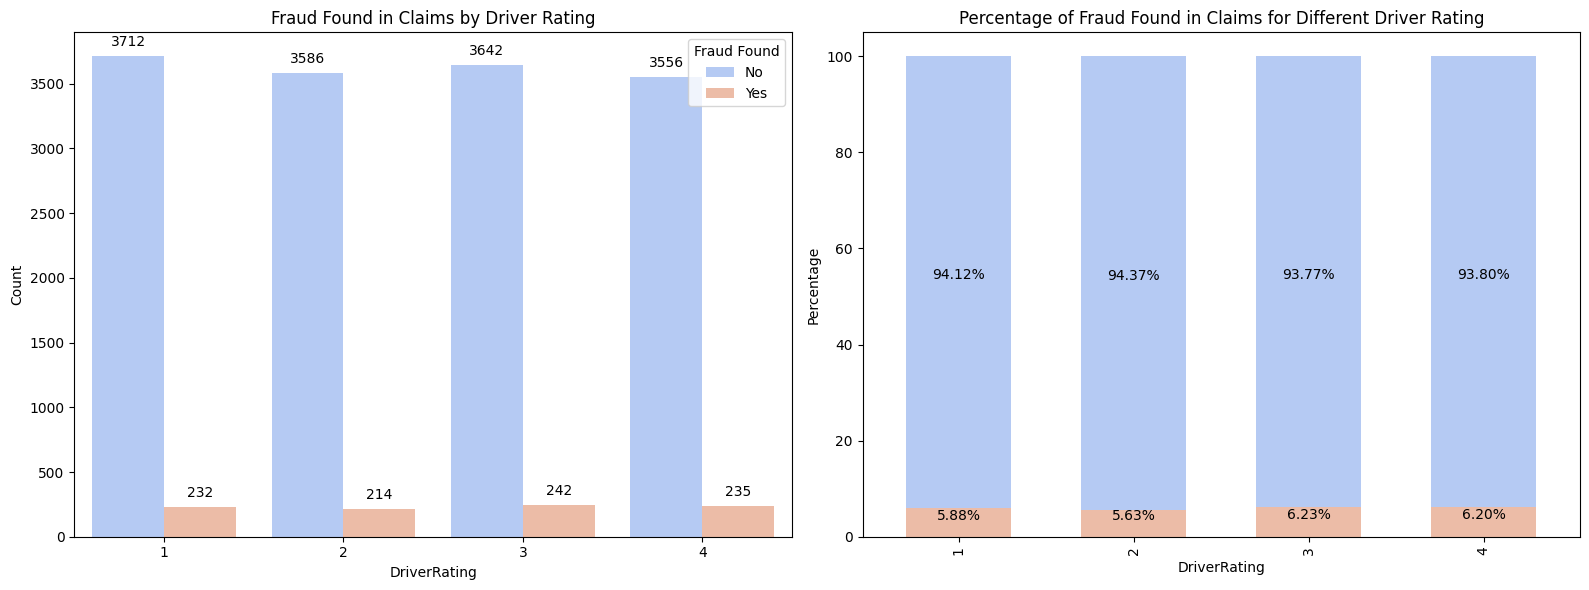

In [25]:
# Plot Driver Rating connection with Fraud
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot
ax = sns.countplot(ax=axes[0], x='DriverRating', hue='FraudFound', data=carclaims_data, palette ='coolwarm')
ax.set_title('Fraud Found in Claims by Driver Rating')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['No', 'Yes'], title='Fraud Found')
ax.legend(handles, labels, title='Fraud Found')
ax.set_xticklabels(['1', '2', '3', '4'])
ax.set_ylabel('Count')

# Annotate each bar with the count
for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')


# Plot on the right (100% stacked column)
fraud_percentage = carclaims_data.groupby('DriverRating')['FraudFound'].value_counts(normalize=True).unstack() * 100
fraud_percentage = fraud_percentage[['Yes', 'No']]  # Reorder the columns
fraud_percentage.plot(kind='bar', stacked=True, ax=axes[1], color = ["#ecbca7", "#b5caf3"], width=0.6)
axes[1].set_title('Percentage of Fraud Found in Claims for Different Driver Rating')
axes[1].set_ylabel('Percentage')

# Annotate each segment with the percentage
for p in axes[1].patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    axes[1].annotate(f'{height:.2f}%', (x + width / 2, y + height / 2), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Hide the legend for the plot on the right
axes[1].legend().set_visible(False)

plt.tight_layout()
plt.savefig("../reports/figures/8-driver-rating.png")
plt.show()


There are imperciptible differences in the percentage of fraud reported for different driver ratings.

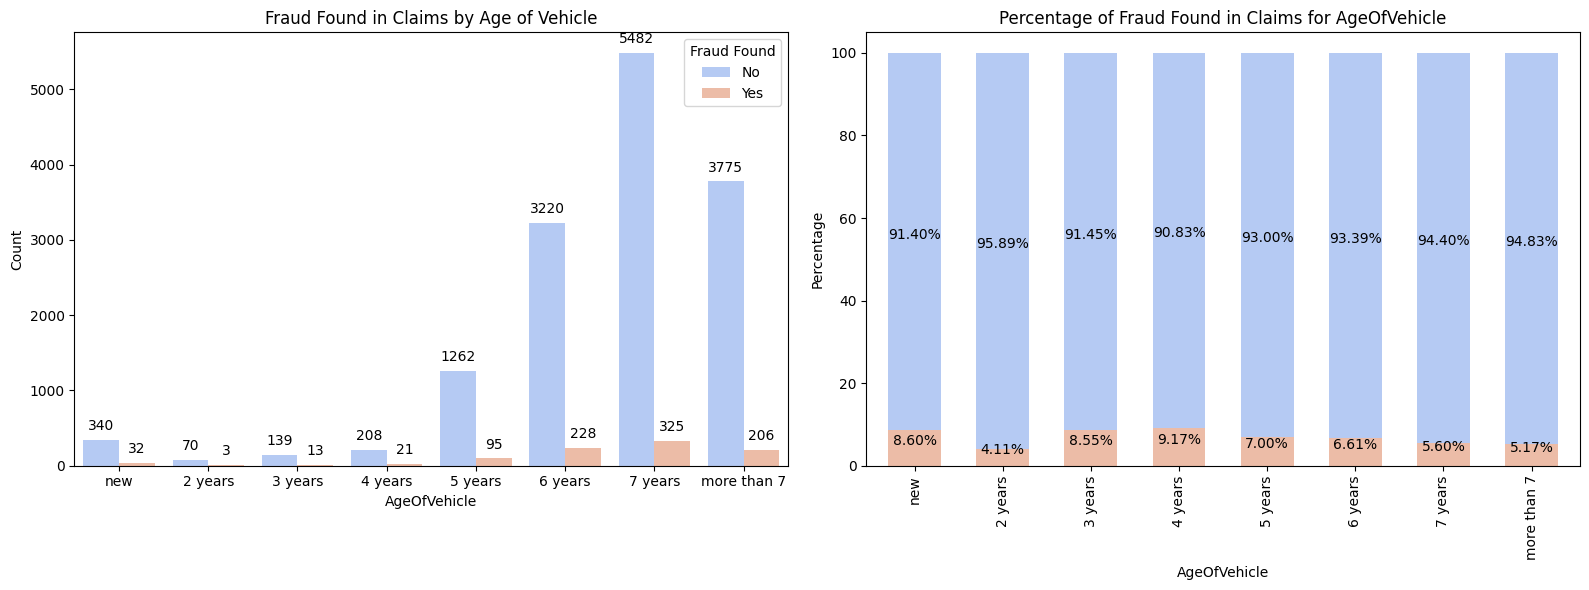

In [26]:
# Plot Age of Vehicle connection with Fraud
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot on the left
ax = sns.countplot(ax=axes[0], x='AgeOfVehicle', hue='FraudFound', data=carclaims_data, order=age_order, palette='coolwarm')
ax.set_title('Fraud Found in Claims by Age of Vehicle')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['No', 'Yes'], title='Fraud Found')
ax.set_ylabel('Count')

# Annotate each bar with the count
for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

# Plot on the right (100% stacked column)
fraud_percentage = carclaims_data.groupby('AgeOfVehicle')['FraudFound'].value_counts(normalize=True).unstack() * 100
fraud_percentage = fraud_percentage[['Yes', 'No']]  # Reorder the columns
fraud_percentage = fraud_percentage.reindex(age_order)  # Reorder the rows based on age_order
fraud_percentage.plot(kind='bar', stacked=True, ax=axes[1], color=["#ecbca7", "#b5caf3"], width=0.6)
axes[1].set_title('Percentage of Fraud Found in Claims for AgeOfVehicle')
axes[1].set_ylabel('Percentage')

# Annotate each segment with the percentage
for p in axes[1].patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    axes[1].annotate(f'{height:.2f}%', (x + width / 2, y + height / 2), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Hide the legend for the plot on the right
axes[1].legend().set_visible(False)

# Rotate x-axis labels to horizontal

plt.tight_layout()
plt.savefig("../reports/figures/9-age-of-vehicle.png")
plt.show()


Age of vehicle seems to be non-linearly correlated with the occurence of fraud. For vehicle ages of 2 to 4 years, claims reported for older cars seem to be more likely to be fraudulent. For vehicle ages of 4 years and above, claims involving older cars seem less likely to be fraudulent.

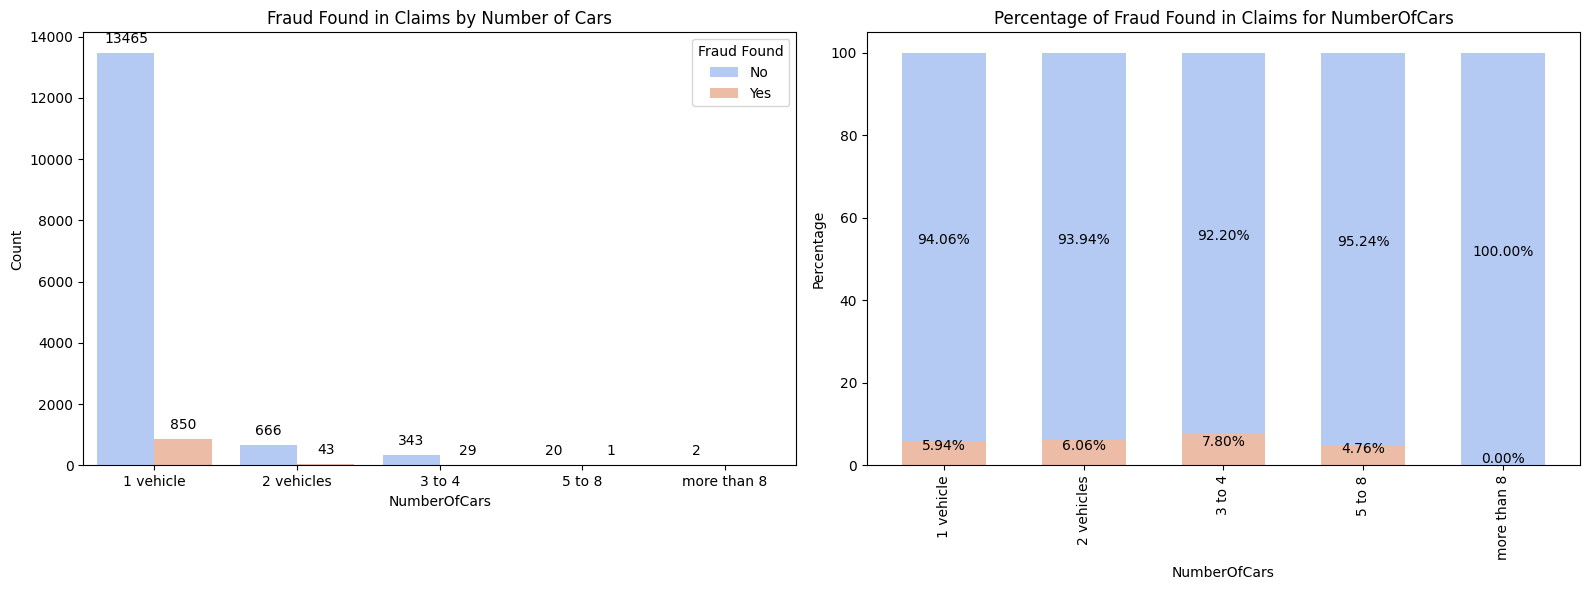

In [27]:
# Plot Number of Cars connection with Fraud
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

noc_order = ['1 vehicle', '2 vehicles', '3 to 4', '5 to 8', 'more than 8']

# Plot
ax = sns.countplot(ax=axes[0], x='NumberOfCars', hue='FraudFound', data=carclaims_data, order=noc_order, palette='coolwarm')
ax.set_title('Fraud Found in Claims by Number of Cars')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['No', 'Yes'], title='Fraud Found')
ax.legend(handles, labels, title='Fraud Found')
ax.set_ylabel('Count')

# Annotate each bar with the count
for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

# Plot on the right (100% stacked column)
fraud_percentage = carclaims_data.groupby('NumberOfCars')['FraudFound'].value_counts(normalize=True).unstack() * 100
fraud_percentage = fraud_percentage[['Yes', 'No']]  # Reorder the columns
fraud_percentage = fraud_percentage.reindex(noc_order)  # Reorder the rows based on age_order
fraud_percentage.plot(kind='bar', stacked=True, ax=axes[1], color=["#ecbca7", "#b5caf3"], width=0.6)
axes[1].set_title('Percentage of Fraud Found in Claims for NumberOfCars')
axes[1].set_ylabel('Percentage')

# Annotate each segment with the percentage
for p in axes[1].patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    axes[1].annotate(f'{height:.2f}%', (x + width / 2, y + height / 2), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Hide the legend for the plot on the right
axes[1].legend().set_visible(False)

plt.tight_layout()
plt.savefig("../reports/figures/10-number-of-cars.png")
plt.show()


Similar to the previous analysis for vehicle age, there seems to be a non-linear trend, whereby claims that involve 3 to 4 cars are most like to be fraudulent.

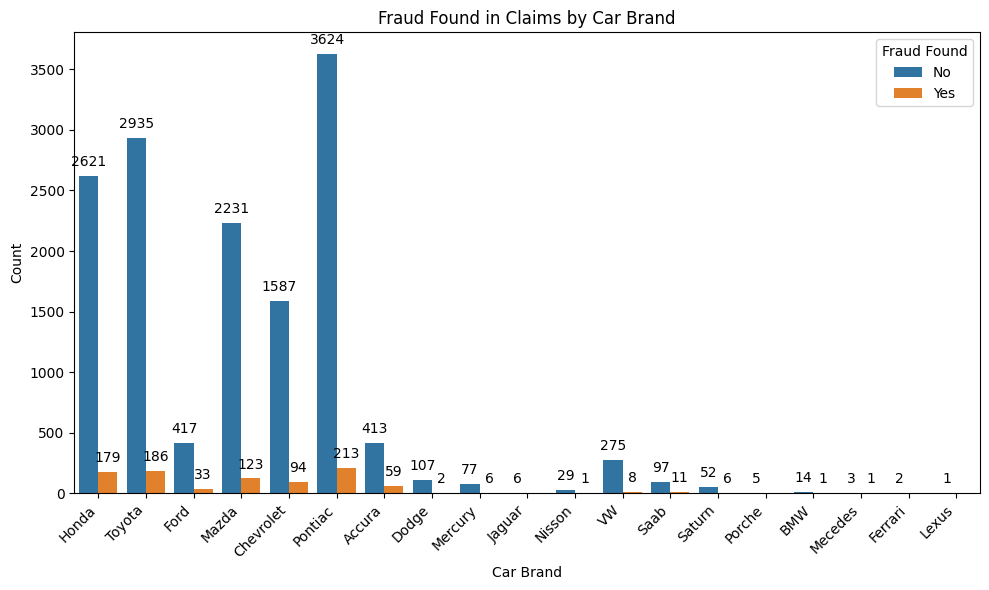

In [28]:
# Plot Car Brand connection with Fraud
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Make', hue='FraudFound', data=carclaims_data)
ax.set_title('Fraud Found in Claims by Car Brand')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['No', 'Yes'], title='Fraud Found')
ax.legend(handles, labels, title='Fraud Found')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.xlabel('Car Brand')

# Annotate each bar with the count
for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.savefig("../reports/figures/11-car-brand.png")
plt.show()

<Figure size 1500x700 with 0 Axes>

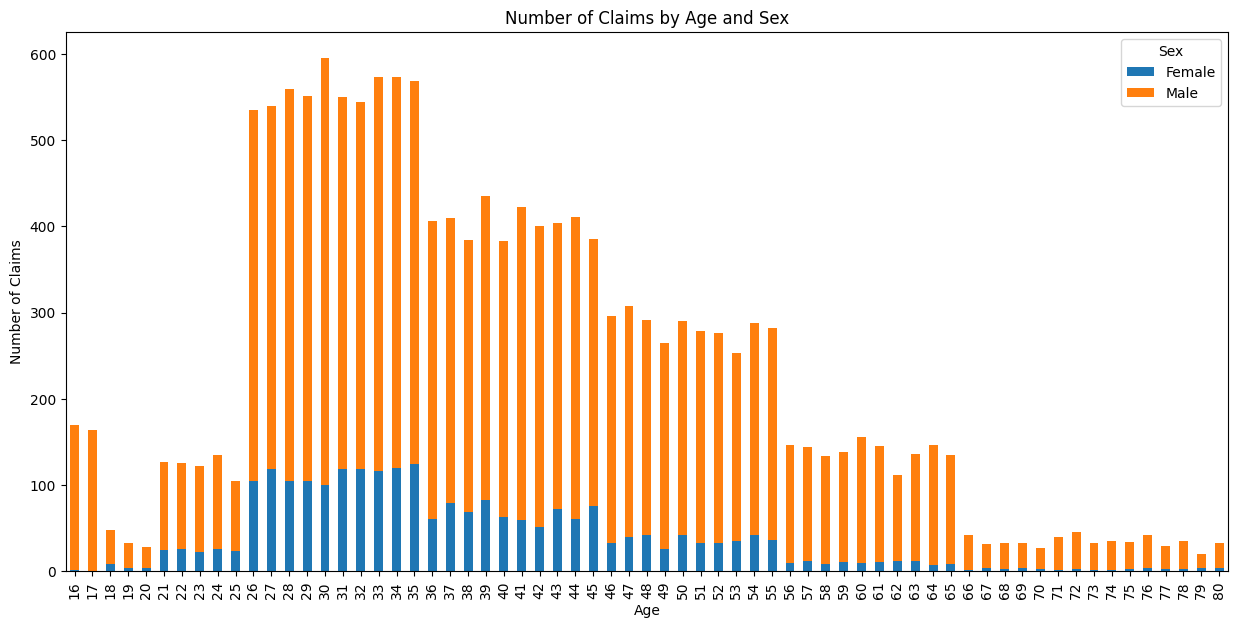

In [29]:
# Group data by Age and Sex and count the number of claims for each group
age_sex_claim_counts = carclaims_data[carclaims_data['Age'] > 0].groupby(['Age', 'Sex']).size().reset_index(name='ClaimCount')

# Plot the data with Sex category stacked
plt.figure(figsize=(15, 7))
age_sex_pivot = age_sex_claim_counts.pivot(index='Age', columns='Sex', values='ClaimCount')
age_sex_pivot.plot(kind='bar', stacked=True, figsize=(15, 7))
plt.title('Number of Claims by Age and Sex')
plt.xlabel('Age')
plt.ylabel('Number of Claims')
plt.legend(title='Sex')
plt.savefig("../reports/figures/12-age-gender.png")
plt.show()


As we can see, the demographic for insurance claims mostly comes from male ages between 26-35. There is a sharp increase in the number of claims from age 25 to 26.

### **3. Correlation Analysis**

The visualization strategy for correlation analysis encompasses a heatmap analysis of the dataset features. This heatmap elucidates correlations and patterns to identify potential trends or relationships within the dataset. High value of feature correlations is identified as it indicates high feature importance in the dataset.

Pearson's Correlation Matrix indicate the linear relationship for numerical features. Meanwhile, Spearman Correlation Matrix enables analysis of ordinal categorical features too.

Each of the categorical features are encoded with ordinally number and mapped into respective columns. This method ensures the categorical features have an ordinal value.

- Pearson Correlation Matrix for Linear correlation
- Spearman Correlation Matrix for Monotonic relationship

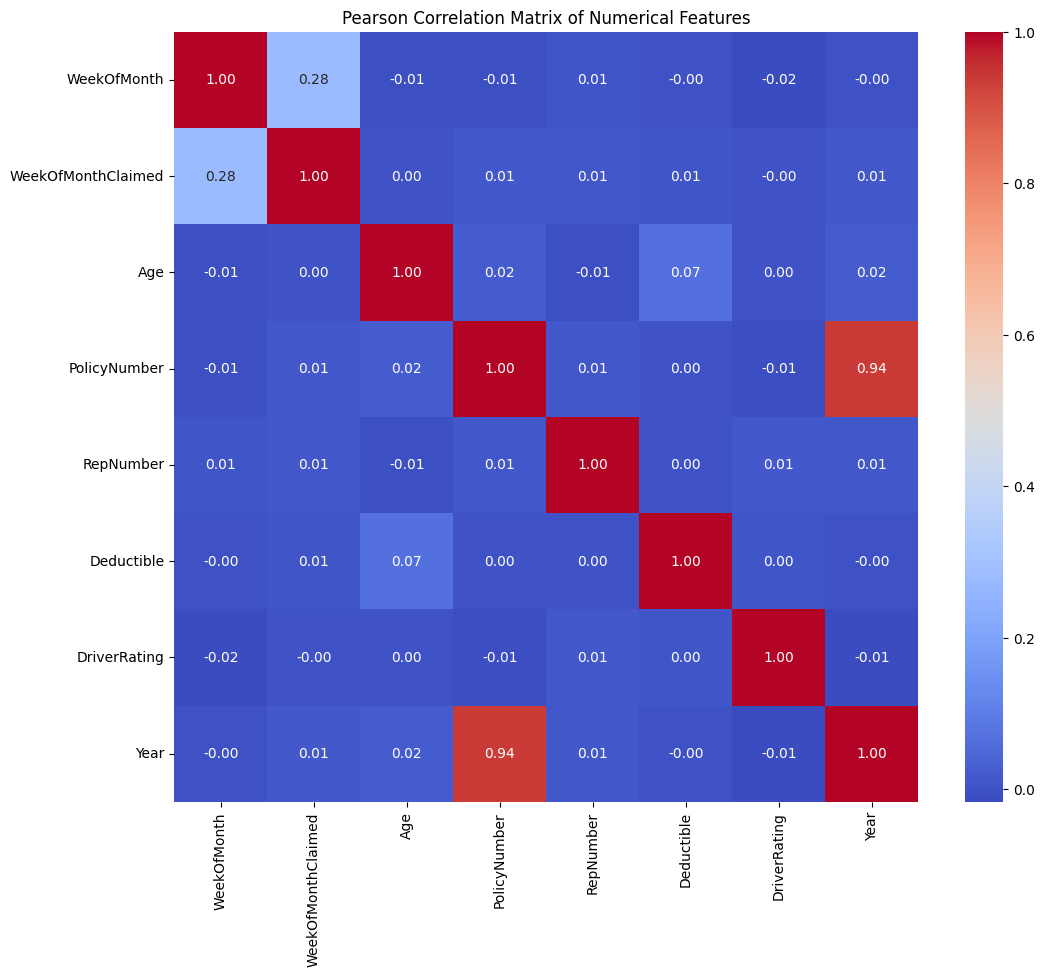

In [30]:
# Select numerical columns
numerical_data = carclaims_data.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
corr_matrix = numerical_data.corr()

# Generate a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Pearson Correlation Matrix of Numerical Features')
plt.xticks(rotation=90)
plt.savefig("../reports/figures/13-pearson-heatmap.png")
plt.show()


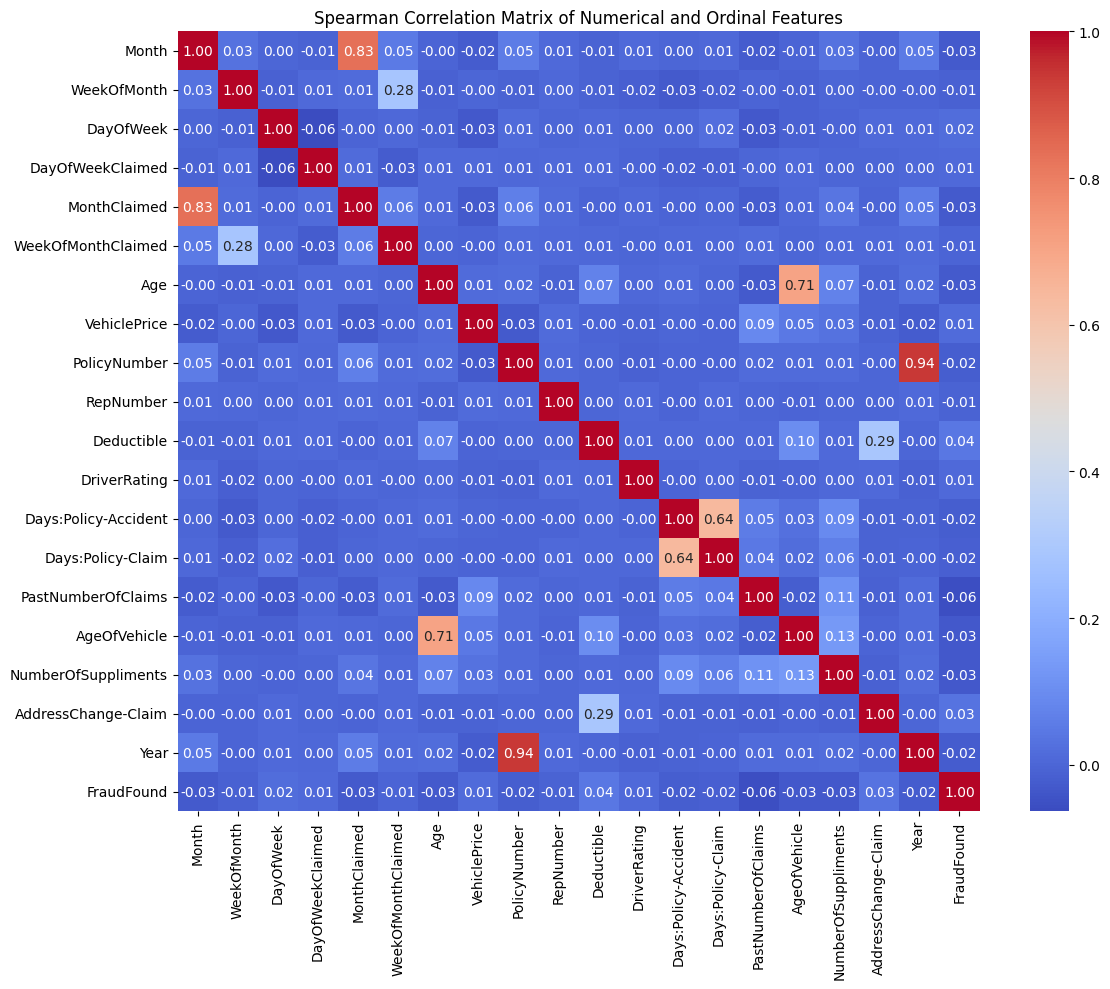

In [32]:
# Create a copy of the original dataframe
modified_data = carclaims_data.copy()

# Encode categorical variables to numerical values
# Define mappings for categorical variables
month_mapping = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
                 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

day_of_week_mapping = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4,
                       'Friday': 5, 'Saturday': 6, 'Sunday': 7}

policy_days_mapping = {'none': 0, '1 to 7': 1, '8 to 15': 2, '15 to 30': 3, 'more than 30': 4}

past_claims_mapping = {'none': 0, '1': 1, '2 to 4': 2, 'more than 4': 3}

vehicle_age_mapping = {'new': 1, '2 years': 2, '3 years': 3, '4 years': 4, '5 years': 5,
                       '6 years': 6, '7 years': 7, 'more than 7': 8}

suppliments_mapping = {'none': 0, '1 to 2': 1, '3 to 5': 2, 'more than 5': 3}

address_change_mapping = {'no change': 0, 'under 6 months': 1, '1 year': 2,
                          '2 to 3 years': 3, '4 to 8 years': 4}

vehicle_price_mapping = {'less than 20,000': 1, '20,000 to 29,000': 2, '30,000 to 39,000': 3,
                         '40,000 to 59,000': 4, '60,000 to 69,000': 5, 'more than 69,000': 6}


# Apply mappings to respective columns
modified_data['Month'] = modified_data['Month'].map(month_mapping)
modified_data['DayOfWeek'] = modified_data['DayOfWeek'].map(day_of_week_mapping)
modified_data['DayOfWeekClaimed'] = modified_data['DayOfWeekClaimed'].map(day_of_week_mapping)
modified_data['MonthClaimed'] = modified_data['MonthClaimed'].map(month_mapping)
modified_data['Days:Policy-Accident'] = modified_data['Days:Policy-Accident'].map(policy_days_mapping)
modified_data['Days:Policy-Claim'] = modified_data['Days:Policy-Claim'].map(policy_days_mapping)
modified_data['PastNumberOfClaims'] = modified_data['PastNumberOfClaims'].map(past_claims_mapping)
modified_data['AgeOfVehicle'] = modified_data['AgeOfVehicle'].map(vehicle_age_mapping)
modified_data['NumberOfSuppliments'] = modified_data['NumberOfSuppliments'].map(suppliments_mapping)
modified_data['AddressChange-Claim'] = modified_data['AddressChange-Claim'].map(address_change_mapping)
modified_data['VehiclePrice'] =modified_data['VehiclePrice'].map(vehicle_price_mapping)

# Convert 'FraudFound' to numerical values (0 and 1)
modified_data['FraudFound'] = modified_data['FraudFound'].map({'No': 0, 'Yes': 1})


# Select only numerical columns
numerical_data = modified_data.select_dtypes(include=['int64', 'float64'])

# Compute the Spearman correlation matrix
spearman_corr_matrix = numerical_data.corr(method='spearman')

# Generate a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(spearman_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Spearman Correlation Matrix of Numerical and Ordinal Features')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("../reports/figures/14-spearman-heatmap.png")
plt.show()


## Model


In [32]:
# Import necessary functions
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc, confusion_matrix, precision_recall_curve, make_scorer
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from scipy.stats import uniform, randint
import pickle

# Set the seed for reproducibility
seed = 42

### Feature Engineering

Encoding transforms the categorical data into a numerical format. One-Hot Encoding is pexgboostormed to  create new columns, each representing a possible category in the original data. For each record, only one of these new columns will have a value of 1, and the rest will have 0s.

In [33]:
carclaims_data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No


In [34]:
# Identify categorical columns to encode
categorical_columns = carclaims_data.select_dtypes(include=['object']).columns.tolist()

# Apply one-hot encoding to categorical columns
data_encoded = pd.get_dummies(carclaims_data, columns=categorical_columns, drop_first=True)

# Ensure all encoded columns are of integer type to display 0 or 1
data_encoded = data_encoded.astype(int)

# Save to csv
data_encoded.to_csv("../data/processed/encoded_data.csv", index=False)

# Display the first few rows of the encoded data
data_encoded.head()

,WeekOfMonth,WeekOfMonthClaimed,Age,PolicyNumber,RepNumber,Deductible,DriverRating,Year,Month_Aug,Month_Dec,...,AddressChange-Claim_4 to 8 years,AddressChange-Claim_no change,AddressChange-Claim_under 6 months,NumberOfCars_2 vehicles,NumberOfCars_3 to 4,NumberOfCars_5 to 8,NumberOfCars_more than 8,BasePolicy_Collision,BasePolicy_Liability,FraudFound_Yes
0,5,1,21,1,12,300,1,1994,0,1,...,0,0,0,0,1,0,0,0,1,0
1,3,4,34,2,15,400,4,1994,0,0,...,0,1,0,0,0,0,0,1,0,0
2,5,2,47,3,7,400,3,1994,0,0,...,0,1,0,0,0,0,0,1,0,0
3,2,1,65,4,4,400,2,1994,0,0,...,0,1,0,0,0,0,0,0,1,0
4,5,2,27,5,3,400,1,1994,0,0,...,0,1,0,0,0,0,0,1,0,0


### Data Split

In [35]:
# Split the dataset into predictors and the target variable

X = data_encoded.drop('FraudFound_Yes', axis=1)
y = data_encoded['FraudFound_Yes']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# Save to csv
X_train.to_csv('../data/processed/X_train.csv', index=False)
X_test.to_csv('../data/processed/X_test.csv', index=False)
y_train.to_csv('../data/processed/y_train.csv', index=False)
y_test.to_csv('../data/processed/y_test.csv', index=False)

### Stratified K-fold Cross Validation

In [37]:
# Define stratified k-fold cross validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

### Evaluation Metrics

In [ ]:
# Function to evaluate the model at the best threshold
def evaluate_model_at_threshold(model, X_test, y_test, best_threshold=0.5): 
    # Get predicted probabilities for the positive class
    y_proba_test = model.predict_proba(X_test)[:, 1]
    
    # Apply the best threshold
    y_pred_adjusted = (y_proba_test >= best_threshold).astype(int)

    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred_adjusted)
    precision = precision_score(y_test, y_pred_adjusted)
    recall = recall_score(y_test, y_pred_adjusted)
    f1 = f1_score(y_test, y_pred_adjusted)

    # Compute confusion matrix and specificity
    cm = confusion_matrix(y_test, y_pred_adjusted)
    TN, FP, FN, TP = cm.ravel()
    specificity = TN / (TN + FP) if (TN + FP) != 0 else 0

    # Compute AUC-PR
    precision_pr, recall_pr, _ = precision_recall_curve(y_test, y_proba_test)
    auc_pr = auc(recall_pr, precision_pr)

    return best_threshold, accuracy, precision, recall, f1, auc_pr, specificity


# Custom scorer for AUC-PR
def auc_pr_scorer(y_true, y_proba):
    precision, recall, _ = precision_recall_curve(y_true, y_proba)
    return auc(recall, precision)

scorer = make_scorer(auc_pr_scorer)

### Hyperparameter Tuning

In [61]:
# Define hyperparameter tuning methods
# Random Search Tuning
def random_search_tuning(model, param_dist, X_train, y_train):
    random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=20,
                                       scoring=scorer, cv=skf, random_state=seed,
                                       n_jobs=-1, error_score='raise')
    random_search.fit(X_train, y_train)
    return random_search.best_estimator_

# Define Hyperparameter Space

rf_random_param_space = {
    'classifier__n_estimators': randint(50, 1000),
    'classifier__max_depth': randint(3, 50),
    'classifier__min_samples_split': randint(2, 20),
    'classifier__min_samples_leaf': randint(1, 10),
    'classifier__max_features': ['sqrt', 'log2', None],
    'classifier__bootstrap': [True, False],
    'classifier__criterion': ['gini', 'entropy'],
}

xgboost_random_param_space = {
    'classifier__max_depth': randint(3, 10),
    'classifier__learning_rate': uniform(0.01, 0.3),
    'classifier__n_estimators': randint(50, 1000),
    'classifier__min_child_weight': randint(1, 10),
    'classifier__gamma': uniform(0, 0.5),
    'classifier__subsample': uniform(0.5, 0.5),
    'classifier__colsample_bytree': uniform(0.5, 0.5),
    'classifier__scale_pos_weight': [1, 5, 10]
}

### Model Initialization and Pipeline Definition

In [62]:
# Define SMOTE
smote = SMOTE(random_state=seed)

# Calculate class weights
positive_count = y_train.sum()
negative_count = len(y_train) - positive_count
scale_pos_weight = negative_count / positive_count if positive_count > 0 else 1
class_weights = {0: 1, 1: scale_pos_weight}  # Assuming binary classification (0 and 1)

# Define Base Models
rf_model = RandomForestClassifier(random_state=seed)
rf_model_weighted = RandomForestClassifier(class_weight=class_weights, random_state=seed)

xgboost_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=seed)
xgboost_model_weighted = XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                                           scale_pos_weight=scale_pos_weight, random_state=seed)

# Random Forest Pipelines
rf_pipeline_none = Pipeline([('classifier', rf_model)])  # No balancing
rf_pipeline_smote = Pipeline([('smote', smote), ('classifier', rf_model)])  # SMOTE only
rf_pipeline_weighted = Pipeline([('classifier', rf_model_weighted)])  # Class weights only
rf_pipeline_smote_weighted = Pipeline([('smote', smote), ('classifier', rf_model_weighted)])  # SMOTE + class weights

# XGBoost Pipelines
xgboost_pipeline_none = Pipeline([('classifier', xgboost_model)])  # No balancing
xgboost_pipeline_smote = Pipeline([('smote', smote), ('classifier', xgboost_model)])  # SMOTE only
xgboost_pipeline_weighted = Pipeline([('classifier', xgboost_model_weighted)])  # Class weights only
xgboost_pipeline_smote_weighted = Pipeline([('smote', smote), ('classifier', xgboost_model_weighted)])  # SMOTE + class weights

### Model Training and Serialization

In [63]:
# Define function to save models

def save_model(model, file_path: str):
    """Function to save model to a pickle file"""
    with open(file_path, 'wb') as f:
        pickle.dump(model, f)
    print(f"Model saved to {file_path}")

In [64]:
# Random Forest Model Training
print('Training Random Forest Model...')
rf_none = random_search_tuning(rf_pipeline_none, rf_random_param_space, X_train, y_train)
save_model(rf_none, '../models/rf_none.pkl')

print('Training Random Forest Model with SMOTE')
rf_smote = random_search_tuning(rf_pipeline_smote, rf_random_param_space, X_train, y_train)
save_model(rf_smote, '../models/rf_smote.pkl')

print('Training Random Forest Model with Weighted Classes')
rf_weighted = random_search_tuning(rf_pipeline_weighted, rf_random_param_space, X_train, y_train)
save_model(rf_weighted, '../models/rf_weighted.pkl')

print('Training Random Forest Model with SMOTE and Weighted Classes')
rf_smote_weighted = random_search_tuning(rf_pipeline_smote_weighted, rf_random_param_space, X_train, y_train)
save_model(rf_smote_weighted, '../models/rf_smote_weighted.pkl')

Training Random Forest Model...
Model saved to ../models/rf_none.pkl
Training Random Forest Model with SMOTE
Model saved to ../models/rf_smote.pkl
Training Random Forest Model with Weighted Classes
Model saved to ../models/rf_weighted.pkl
Training Random Forest Model with SMOTE and Weighted Classes
Model saved to ../models/rf_smote_weighted.pkl


In [65]:
# Random Forest Model Training
print('Training XGBoost...')
xgboost_none = random_search_tuning(xgboost_pipeline_none, xgboost_random_param_space, X_train, y_train)
save_model(xgboost_none, '../models/xgboost_none.pkl')

print('Training XGBoost with SMOTE...')
xgboost_smote = random_search_tuning(xgboost_pipeline_smote, xgboost_random_param_space, X_train, y_train)
save_model(xgboost_smote, '../models/xgboost_smote.pkl')

print('Training XGBoost with Weighted Classes...')
xgboost_weighted = random_search_tuning(xgboost_pipeline_weighted, xgboost_random_param_space, X_train, y_train)
save_model(xgboost_weighted, '../models/xgboost_weighted.pkl')

print('Training XGBoost with SMOTE and Weighted Classes...')
xgboost_smote_weighted = random_search_tuning(xgboost_pipeline_smote_weighted, xgboost_random_param_space, X_train, y_train)
save_model(xgboost_smote_weighted, '../models/xgboost_smote_weighted.pkl')

Training XGBoost...


d:\OneDrive\Repos\fraud-detection\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:33:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Model saved to ../models/xgboost_none.pkl
Training XGBoost with SMOTE...


d:\OneDrive\Repos\fraud-detection\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:35:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Model saved to ../models/xgboost_smote.pkl
Training XGBoost with Weighted Classes...


d:\OneDrive\Repos\fraud-detection\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:37:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Model saved to ../models/xgboost_weighted.pkl
Training XGBoost with SMOTE and Weighted Classes...


d:\OneDrive\Repos\fraud-detection\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:39:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Model saved to ../models/xgboost_smote_weighted.pkl


## Interpret

In [66]:
# Evaluate all models
models = {
    'Random Forest':rf_none,
    'Random Forest SMOTE': rf_smote,
    'Random Forest Weighted': rf_weighted,
    'Random Forest SMOTE + Weighted': rf_smote_weighted,
    'XGBoost':xgboost_none,
    'XGBoost SMOTE': xgboost_smote,
    'XGBoost Weighted': xgboost_weighted,
    'XGBoost SMOTE + Weighted': xgboost_smote_weighted,
}

In [70]:
# Obtain best threshold
from sklearn.model_selection import cross_val_predict

def get_best_threshold(model, X_train=X_train, y_train=y_train):

    # Get out-of-fold probabilities
    y_proba_cv = cross_val_predict(model, X_train, y_train, cv=skf, method="predict_proba")[:, 1]

    # Compute precision-recall curve
    precisions, recalls, thresholds = precision_recall_curve(y_train, y_proba_cv)

    # Compute F1-scores for different thresholds
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
    best_threshold = thresholds[f1_scores.argmax()]  # Find best threshold
    return best_threshold

In [ ]:
# Dictionary to store best thresholds
best_thresholds = {}

# Compute and store the best threshold for each model
for model_name, model in models.items():
    best_thresholds[model_name] = get_best_threshold(model)

# Add thresholds to the models dictionary
models_with_thresholds = {name: {"model": model, "best_threshold": best_thresholds[name]} for name, model in models.items()}


C:\Users\user\AppData\Local\Temp\ipykernel_6284\585486591.py:13: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
C:\Users\user\AppData\Local\Temp\ipykernel_6284\585486591.py:13: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
d:\OneDrive\Repos\fraud-detection\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:15:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
d:\OneDrive\Repos\fraud-detection\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:15:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
d:\OneDrive\Repos\fraud-detection\.venv\Lib\site-packages\xgboost\training.py:183: UserWar

{'Random Forest': {'model': Pipeline(steps=[('classifier',
                 RandomForestClassifier(bootstrap=False, max_depth=24,
                                        min_samples_leaf=2,
                                        min_samples_split=13, n_estimators=463,
                                        random_state=42))]), 'best_threshold': np.float64(0.1514072570568478)}, 'Random Forest SMOTE': {'model': Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('classifier',
                 RandomForestClassifier(bootstrap=False, max_depth=37,
                                        max_features='log2',
                                        min_samples_split=5, n_estimators=611,
                                        random_state=42))]), 'best_threshold': np.float64(0.6215561920349155)}, 'Random Forest Weighted': {'model': Pipeline(steps=[('classifier',
                 RandomForestClassifier(bootstrap=False,
                                        class_weight={0:

In [84]:
for name, info in models_with_thresholds.items():
    print(f"{name}: {info['best_threshold']:.4f}")  # Format to 4 decimal places


Random Forest: 0.1514
Random Forest SMOTE: 0.6216
Random Forest Weighted: 0.5593
Random Forest SMOTE + Weighted: 0.9516
XGBoost: 0.5022
XGBoost SMOTE: 0.4156
XGBoost Weighted: 0.5022
XGBoost SMOTE + Weighted: 0.4156


In [92]:
results = {}
for name, data in models_with_thresholds.items():
    model = data['model']
    best_threshold = data['best_threshold']
    results[name] = evaluate_model_at_threshold(model, X_test, y_test, best_threshold)

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame.from_dict(results, orient='index', 
                                    columns=['Best_Threshold', 'Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC-PR', 'Specificity'])

results_df.to_csv('../reports/test_performance.csv')

results_df

,Best_Threshold,Accuracy,Precision,Recall,F1-score,AUC-PR,Specificity
Random Forest,0.151407,0.890078,0.263514,0.391960,0.315152,0.276192,0.924437
Random Forest SMOTE,0.621556,0.935798,1.000000,0.005025,0.010000,0.186276,1.000000
Random Forest Weighted,0.559337,0.878080,0.204013,0.306533,0.244980,0.181611,0.917504
Random Forest SMOTE + Weighted,0.951625,0.936122,0.750000,0.015075,0.029557,0.166675,0.999653
XGBoost,0.502217,0.955577,0.635965,0.728643,0.679157,0.697696,0.971231
XGBoost SMOTE,0.415581,0.943904,0.558036,0.628141,0.591017,0.612222,0.965685
XGBoost Weighted,0.502217,0.955577,0.635965,0.728643,0.679157,0.697696,0.971231
XGBoost SMOTE + Weighted,0.415581,0.943904,0.558036,0.628141,0.591017,0.612222,0.965685
